<a href="https://colab.research.google.com/github/Abdulbarikassim/FaceEmotionDetection/blob/main/Custom_Fer_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os


# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download the fer2013 dataset
!kaggle datasets download -d msambare/fer2013 -p /content/gdrive/MyDrive/

# Unzip the dataset
!unzip /content/gdrive/MyDrive/fer2013.zip -d /content/gdrive/MyDrive/

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/train/sad/Training_65242339.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65267116.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65275626.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_6529266.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65329617.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65338712.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65338797.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65387162.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65404494.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65426218.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65430136.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65437377.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_6545735.jpg  
  inflating: /content/gdrive

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

#path to my training and testing data.

train_data_dir = '/content/drive/MyDrive/subset_train'
test_data_dir = '/content/drive/MyDrive/test'

# image size and batch size

IMG_SIZE = (48,48)
BATCH_SIZE = 64
NUM_CLASSES = 7
#loading and preprocessing of the images.

# Augmentation and normalization
augmented_train_data = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_test_data = ImageDataGenerator(rescale=1.0/255)

# Load images using ImageDataGenerator
train_data = augmented_train_data.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

test_data = augmented_test_data.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)



Found 10720 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


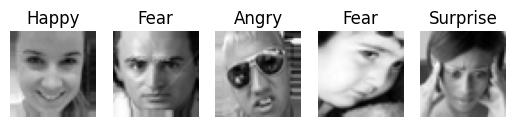

In [ ]:
import matplotlib.pyplot as plt

#fetch one batch
images ,labels  = next(train_data)
#labels map to numerical

label_map = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

#displaying random  first 5 images.
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i][:,:,0],cmap='gray')
  plt.title(f"{label_map[np.argmax(labels[i])]}")
  plt.axis('off')

plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
import time


#number of classes
num_classes = len(train_data.class_indices)



#create the custom CNN model
def custom_cnn():
  model = Sequential([
      Input(shape=(48,48,1)),
      #1st layer
      Conv2D(16,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      BatchNormalization(),
      #second layer
      Conv2D(32,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      BatchNormalization(),

      #third layer
      Conv2D(64,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      BatchNormalization(),

      Flatten(),
      Dense(128,activation='relu'),
      Dropout(0.5),
      Dense(num_classes,activation='softmax')

  ])

  return model

  return model
# Create the model
model = custom_cnn()

#start time of the model
start_time = time.time()


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
built_custom_cnn = model.fit(train_data,epochs=20,validation_data=test_data)

#total time taken to train the model

end_time = time.time()
total_time = (end_time - start_time)/60



#training accuracy of the model
train_accuracy = built_custom_cnn.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}% ")

print(f"Total time taken to train the model: {total_time:.2f} minutes")

#saving the model for in google drive for later use.
model_path = '/content/drive/MyDrive/my_model_2.h5'
model.save(model_path)

print(f"model save to: {model_path}")



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 5035s 30s/step - accuracy: 0.2168 - loss: 2.2776 - val_accuracy: 0.1863 - val_loss: 1.9319
Epoch 2/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 501ms/step - accuracy: 0.3086 - loss: 1.8001 - val_accuracy: 0.2008 - val_loss: 1.9315
Epoch 3/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 500ms/step - accuracy: 0.3487 - loss: 1.6855 - val_accuracy: 0.3947 - val_loss: 1.5866
Epoch 4/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 85s 506ms/step - accuracy: 0.3761 - loss: 1.6239 - val_accuracy: 0.4542 - val_loss: 1.4431
Epoch 5/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 498ms/step - accuracy: 0.3873 - loss: 1.5882 - val_accuracy: 0.4455 - val_loss: 1.4655
Epoch 6/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 500ms/step - accuracy: 0.3991 - loss: 1.5469 - val_accuracy: 0.4457 - val_loss: 1.4649
Epoch 7/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 84s 500ms/step - accuracy: 0.4288 - loss: 1.4937 - val_accuracy: 0.4643 - val_loss: 1.3941
Epoch 8/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 98s 582ms/step - accuracy: 0.4359 - loss: 1

In [ ]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
#evaluate the model on test data.
test_loss , test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
import numpy as np

# Get a batch of test images and labels
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)

# Convert softmax outputs to label indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print first 10 predictions
print("Predicted labels: ", predicted_labels[:5])
print("True labels: ", true_labels[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 
Predicted labels:  [3 3 3 4 6]
True labels:  [3 3 3 5 6]


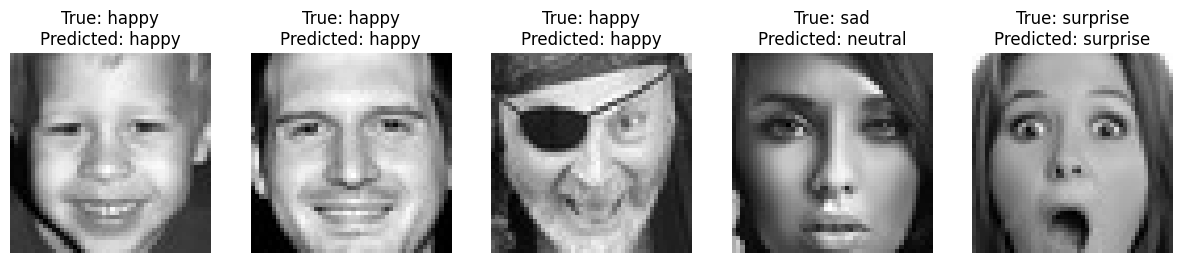

In [ ]:
import matplotlib.pyplot as plt

# label mapping from train data
label_map = train_data.class_indices
label_map = {v: k for k, v in train_data.class_indices.items()}

# displaying the test images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(test_images[i].reshape(48, 48), cmap='gray')
    axes[i].set_title(f"True: {label_map[true_labels[i]]}\nPredicted: {label_map[predicted_labels[i]]}")
    axes[i].axis('off')
plt.show()